# Summary



# Intro

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from biodata import *

In [8]:
import functions as fn

In [9]:
from common import dat

In [10]:
%matplotlib inline

# Load data

## DDC

In [6]:
DATA_QUERY_TEMPLATE = """\
SELECT a.*,
{features}
FROM az_dream_2015.ALL_TRAINING_DATA_WSYNERGY a
{tables}
;
"""

In [7]:
GB_D = [
    'az_dream_2015.ALL_TRAINING_DATA_GBD',
    'cnv_gbd',
    'cnv_gbd_stitch',
    'gex_gbd',
    'gex_gbd_stitch',
    'methyl_gbd',
    'methyl_gbd_stitch',
    'mutations_gbd',
    'mutations_gbd_stitch',
    'achilles_rnai_gbd',
    'achilles_rnai_gbd_stitch',
]

GB_DC = [
    'az_dream_2015.ALL_TRAINING_DATA_GBDC',
    'cnv_gbdc',
    'cnv_gbdc_stitch',
    'gex_gbdc',
    'gex_gbdc_stitch',
    'methyl_gbdc',
    'methyl_gbdc_stitch',
    'mutations_gbdc',
    'mutations_gbdc_stitch',
    'achilles_rnai_gbdc',
    'achilles_rnai_gbdc_stitch',
]

GB_DD = [
    'az_dream_2015.ALL_TRAINING_DATA_GBDD',
    'az_dream_2015_features.drug_pair_info_gbdd',
    'az_dream_2015_features.clare_gbdd',
    'az_dream_2015_features.clare_gbdd_stitch',
]

GB_C = [
    'az_dream_2015.ALL_TRAINING_DATA_GBC',
    'cnv_gbc',
    'gex_gbc',
    'methyl_gbc',
    'mutations_gbc',
    'achilles_rnai_gbc',
]

In [8]:
engine = sa.create_engine("mysql://strokach:@192.168.6.19:3306/az_dream_2015_features")

tables = []
features = []

# Queries that use .* have to come first
tables.append('-- GB_DD')
features.append('\n-- GB_DD')
for whole_table_name in GB_DD:
    table_name = whole_table_name.split('.')[-1]
    features.append('-- {}'.format(table_name))
    tables.append("LEFT JOIN {0} {1} USING (d_1, d_2)".format(whole_table_name, table_name))
    features.append('{}.*'.format(table_name))

tables.append('-- GB_C')
features.append('\n-- GB_C')
for whole_table_name in GB_C:
    table_name = whole_table_name.split('.')[-1]
    features.append('-- {}'.format(table_name))
    tables.append("LEFT JOIN {0} {1} USING (c)".format(whole_table_name, table_name))
    features.append('{}.*'.format(table_name))

tables.append('-- GB_D')
features.append('\n-- GB_D')
for whole_table_name in GB_D:
    table_name = whole_table_name.split('.')[-1]
    features.append('-- {}'.format(table_name))
    tables.append("LEFT JOIN {0} {1}_1 ON ({1}_1.d = a.d_1)".format(whole_table_name, table_name))
    tables.append("LEFT JOIN {0} {1}_2 ON ({1}_2.d = a.d_2)".format(whole_table_name, table_name))
    #
    df = pd.read_sql_query("select * from {} limit 0".format(whole_table_name), engine)
    for column in df.columns:
        if column in ['d', 'g', 'c']:
            continue
        features.append("({0}_1.{1} + {0}_2.{1}) / 2 {1}_mean".format(table_name, column))
        features.append("abs({0}_2.{1} - {0}_1.{1}) {1}_diff".format(table_name, column))

tables.append('-- GB_DC')
features.append('\n-- GB_DC')
for whole_table_name in GB_DC:
    table_name = whole_table_name.split('.')[-1]
    features.append('-- {}'.format(table_name))
    tables.append("LEFT JOIN {0} {1}_1 ON ({1}_1.d = a.d_1 AND {1}_1.c = a.c)".format(whole_table_name, table_name))
    tables.append("LEFT JOIN {0} {1}_2 ON ({1}_2.d = a.d_2 AND {1}_2.c = a.c)".format(whole_table_name, table_name))
    #
    df = pd.read_sql_query("select * from {} limit 0".format(whole_table_name), engine)
    for column in df.columns:
        if column in ['d', 'g', 'c']:
            continue
        features.append("({0}_1.{1} + {0}_2.{1}) / 2 {1}_mean".format(table_name, column))
        features.append("abs({0}_2.{1} - {0}_1.{1}) {1}_diff".format(table_name, column))
        
data_query = DATA_QUERY_TEMPLATE.format(tables="\n".join(tables), features=",\n".join(features))
with open('machine_learning/load_data.sql', 'wt') as ofh:
    ofh.write(data_query)

In [9]:
engine = sa.create_engine('mysql://strokach:@192.168.6.19:3306/az_dream_2015_features')
df = pd.read_sql_query(data_query, engine)

In [10]:
df.shape

(39284, 845)

In [11]:
df.head()

,c,d_1,d_2,synergy_score,qa,source,max_conc_max,max_conc_min,max_conc_diff,max_conc_same,ic50_mean,ic50_diff,h_mean,h_diff,einf_mean,einf_diff,d_1,d_2,count_gbdd,max_conc_gbdd_mean_max,max_conc_gbdd_mean_min,max_conc_gbdd_mean_diff,max_conc_gbdd_mean_same,max_conc_gbdd_std_max,max_conc_gbdd_std_min,max_conc_gbdd_std_diff,max_conc_gbdd_std_same,max_conc_gbdd_max_max,max_conc_gbdd_max_min,max_conc_gbdd_max_diff,max_conc_gbdd_max_same,max_conc_gbdd_min_max,max_conc_gbdd_min_min,max_conc_gbdd_min_diff,max_conc_gbdd_min_same,ic50_gbdd_mean_mean,ic50_gbdd_mean_diff,ic50_gbdd_std_mean,ic50_gbdd_std_diff,ic50_gbdd_max_mean,ic50_gbdd_max_diff,ic50_gbdd_min_mean,ic50_gbdd_min_diff,h_gbdd_mean_mean,h_gbdd_mean_diff,h_gbdd_std_mean,h_gbdd_std_diff,h_gbdd_max_mean,h_gbdd_max_diff,h_gbdd_min_mean,h_gbdd_min_diff,einf_gbdd_mean_mean,einf_gbdd_mean_diff,einf_gbdd_std_mean,einf_gbdd_std_diff,einf_gbdd_max_mean,einf_gbdd_max_diff,einf_gbdd_min_mean,einf_gbdd_min_diff,d_1,d_2,hba_mean,hba_diff,c_log_p_mean,c_log_p_diff,hbd_mean,hbd_diff,lipinski_mean,lipinski_diff,mw_mean,mw_diff,atom_stereo_count_mean,atom_stereo_count_diff,bond_stereo_count_mean,bond_stereo_count_diff,complexity_mean,complexity_diff,conformer_count3_d_mean,conformer_count3_d_diff,conformer_model_rmsd3_d_mean,conformer_model_rmsd3_d_diff,covalent_unit_count_mean,covalent_unit_count_diff,defined_atom_stereo_count_mean,defined_atom_stereo_count_diff,defined_bond_stereo_count_mean,defined_bond_stereo_count_diff,effective_rotor_count3_d_mean,effective_rotor_count3_d_diff,exact_mass_mean,exact_mass_diff,feature_acceptor_count3_d_mean,feature_acceptor_count3_d_diff,feature_anion_count3_d_mean,feature_anion_count3_d_diff,feature_cation_count3_d_mean,feature_cation_count3_d_diff,feature_count3_d_mean,feature_count3_d_diff,feature_donor_count3_d_mean,feature_donor_count3_d_diff,feature_hydrophobe_count3_d_mean,feature_hydrophobe_count3_d_diff,feature_ring_count3_d_mean,feature_ring_count3_d_diff,h_bond_acceptor_count_mean,h_bond_acceptor_count_diff,h_bond_donor_count_mean,h_bond_donor_count_diff,heavy_atom_count_mean,heavy_atom_count_diff,molecular_weight_mean,molecular_weight_diff,monoisotopic_mass_mean,monoisotopic_mass_diff,rotatable_bond_count_mean,rotatable_bond_count_diff,tpsa_mean,tpsa_diff,undefined_atom_stereo_count_mean,undefined_atom_stereo_count_diff,volume3_d_mean,volume3_d_diff,x_log_p_mean,x_log_p_diff,x_steric_quadrupole3_d_mean,x_steric_quadrupole3_d_diff,y_steric_quadrupole3_d_mean,y_steric_quadrupole3_d_diff,z_steric_quadrupole3_d_mean,z_steric_quadrupole3_d_diff,RDKFingerprint_Tanimoto,RDKFingerprint_Dice,RDKFingerprint_Cosine,RDKFingerprint_Russel,RDKFingerprint_Kulczynski,RDKFingerprint_McConnaughey,FingerprintMol_Tanimoto,FingerprintMol_Dice,FingerprintMol_Cosine,FingerprintMol_Russel,FingerprintMol_Kulczynski,FingerprintMol_McConnaughey,MACCSkeys_Tanimoto,MACCSkeys_Dice,MACCSkeys_Cosine,MACCSkeys_Russel,MACCSkeys_Kulczynski,MACCSkeys_McConnaughey,AtomPairFingerprint_Tanimoto,AtomPairFingerprint_Dice,AtomPairFingerprint_Cosine,AtomPairFingerprint_Russel,AtomPairFingerprint_Kulczynski,AtomPairFingerprint_McConnaughey,TopologicalTorsionFingerprint_Tanimoto,TopologicalTorsionFingerprint_Dice,MorganFingerprintR2_Tanimoto,MorganFingerprintR2_Dice,MorganFingerprintR2withFeatures_Tanimoto,MorganFingerprintR2withFeatures_Dice,unique_id,d_1,d_2,bg_degree_mean,bg_degree_max,bg_degree_min,bg_degree_std,bg_clustering_coef_mean,bg_clustering_coef_max,bg_clustering_coef_min,bg_clustering_coef_std,bg_betweenness_mean,bg_betweenness_max,bg_betweenness_min,bg_betweenness_std,bg_closeness_mean,bg_closeness_max,bg_closeness_min,bg_closeness_std,bg_neighbor_sharing_mean,bg_neighbor_sharing_max,bg_neighbor_sharing_min,bg_neighbor_sharing_std,bg_shortest_path_length_mean,bg_shortest_path_length_min,bg_eb_max_max,bg_eb_min_min,bg_eb_mean_mean,bg_eb_fraction_mean,bg_number_of_shortest_paths_mean,bg_number_of_shortest_paths_max,bg_number_of_shortest_paths_min,bg_number_of_shortest_paths_s

In [12]:
df.isnull().sum()

c                                                          0
d_1                                                        0
d_2                                                        0
synergy_score                                          37085
qa                                                     27709
source                                                     0
max_conc_max                                           27709
max_conc_min                                           27709
max_conc_diff                                          27709
max_conc_same                                          27709
ic50_mean                                              27709
ic50_diff                                              27709
h_mean                                                 27709
h_diff                                                 27709
einf_mean                                              27709
einf_diff                                              27709
d_1                     

In [13]:
df_original = df.copy()

In [14]:
df['f_mutation_very_bad_density_gbgc_mean_mean'].shape

(39284,)

## DDC-DDC

In [15]:
GB_DDDD = [
    'az_dream_2015.ALL_TRAINING_DATA_PAIR_GBDDDD',
]

GB_CC = [
    'az_dream_2015.ALL_TRAINING_DATA_PAIR_GBCC',
    'cell_info_gbcc',
    'cnv_gbcc',
    'gex_gbcc',
    'methyl_gbcc',
    'mutations_gbcc',
    'achilles_rnai_gbcc',
]

In [16]:
GB_DDDD_DF = {}
for key in GB_DDDD:
    df = pd.read_sql_query("select * from {}".format(key), engine)
    GB_DDDD_DF[key] = df
    
GB_CC_DF = {}
for key in GB_CC:
    df = pd.read_sql_query("select * from {}".format(key), engine)
    GB_CC_DF[key] = df


## Get rid of cid_diff


In [17]:
df = df_original.copy()

In [18]:
df = df[df['qa'] == 1]

In [19]:
# Correct synergy scores
df.loc[df['synergy_score'] > 100, 'synergy_score'] = 100
df.loc[df['synergy_score'] < -100, 'synergy_score'] = -100

In [20]:
# Remove duplicate columns
seen = Counter()
keep_i = []
keep_name = []
for i, column in enumerate(df.columns):
    if column not in seen:
        seen.update([column])
        keep_i.append(i)
        keep_name.append(column)
    elif seen.get(column) == 1:
        print(column)
        seen.update([column])
        keep_i.append(i)
        keep_name.append(column + '_stitch')
    else:
        # Delete column
        print("\t", column)

df = df.iloc[:, keep_i]
df.columns = keep_name
df.head()

d_1
d_2
	 d_1
	 d_2
	 d_1
	 d_2
unique_id
	 d_1
	 d_2
bg_degree_mean
bg_degree_max
bg_degree_min
bg_degree_std
bg_clustering_coef_mean
bg_clustering_coef_max
bg_clustering_coef_min
bg_clustering_coef_std
bg_betweenness_mean
bg_betweenness_max
bg_betweenness_min
bg_betweenness_std
bg_closeness_mean
bg_closeness_max
bg_closeness_min
bg_closeness_std
bg_neighbor_sharing_mean
bg_neighbor_sharing_max
bg_neighbor_sharing_min
bg_neighbor_sharing_std
bg_shortest_path_length_mean
bg_shortest_path_length_min
bg_eb_max_max
bg_eb_min_min
bg_eb_mean_mean
bg_eb_fraction_mean
bg_number_of_shortest_paths_mean
bg_number_of_shortest_paths_max
bg_number_of_shortest_paths_min
bg_number_of_shortest_paths_std
coexpression_mean
coexpression_max
coexpression_min
coexpression_std
gene_essentiality_max
gi_degree_mean
gi_degree_max
gi_degree_min
gi_degree_std
gi_clustering_coef_mean
gi_clustering_coef_max
gi_clustering_coef_min
gi_clustering_coef_std
gi_betweenness_mean
gi_betweenness_max
gi_betweenness_min
gi_b

,c,d_1,d_2,synergy_score,qa,source,max_conc_max,max_conc_min,max_conc_diff,max_conc_same,ic50_mean,ic50_diff,h_mean,h_diff,einf_mean,einf_diff,d_1_stitch,d_2_stitch,count_gbdd,max_conc_gbdd_mean_max,max_conc_gbdd_mean_min,max_conc_gbdd_mean_diff,max_conc_gbdd_mean_same,max_conc_gbdd_std_max,max_conc_gbdd_std_min,max_conc_gbdd_std_diff,max_conc_gbdd_std_same,max_conc_gbdd_max_max,max_conc_gbdd_max_min,max_conc_gbdd_max_diff,max_conc_gbdd_max_same,max_conc_gbdd_min_max,max_conc_gbdd_min_min,max_conc_gbdd_min_diff,max_conc_gbdd_min_same,ic50_gbdd_mean_mean,ic50_gbdd_mean_diff,ic50_gbdd_std_mean,ic50_gbdd_std_diff,ic50_gbdd_max_mean,ic50_gbdd_max_diff,ic50_gbdd_min_mean,ic50_gbdd_min_diff,h_gbdd_mean_mean,h_gbdd_mean_diff,h_gbdd_std_mean,h_gbdd_std_diff,h_gbdd_max_mean,h_gbdd_max_diff,h_gbdd_min_mean,h_gbdd_min_diff,einf_gbdd_mean_mean,einf_gbdd_mean_diff,einf_gbdd_std_mean,einf_gbdd_std_diff,einf_gbdd_max_mean,einf_gbdd_max_diff,einf_gbdd_min_mean,einf_gbdd_min_diff,hba_mean,hba_diff,c_log_p_mean,c_log_p_diff,hbd_mean,hbd_diff,lipinski_mean,lipinski_diff,mw_mean,mw_diff,atom_stereo_count_mean,atom_stereo_count_diff,bond_stereo_count_mean,bond_stereo_count_diff,complexity_mean,complexity_diff,conformer_count3_d_mean,conformer_count3_d_diff,conformer_model_rmsd3_d_mean,conformer_model_rmsd3_d_diff,covalent_unit_count_mean,covalent_unit_count_diff,defined_atom_stereo_count_mean,defined_atom_stereo_count_diff,defined_bond_stereo_count_mean,defined_bond_stereo_count_diff,effective_rotor_count3_d_mean,effective_rotor_count3_d_diff,exact_mass_mean,exact_mass_diff,feature_acceptor_count3_d_mean,feature_acceptor_count3_d_diff,feature_anion_count3_d_mean,feature_anion_count3_d_diff,feature_cation_count3_d_mean,feature_cation_count3_d_diff,feature_count3_d_mean,feature_count3_d_diff,feature_donor_count3_d_mean,feature_donor_count3_d_diff,feature_hydrophobe_count3_d_mean,feature_hydrophobe_count3_d_diff,feature_ring_count3_d_mean,feature_ring_count3_d_diff,h_bond_acceptor_count_mean,h_bond_acceptor_count_diff,h_bond_donor_count_mean,h_bond_donor_count_diff,heavy_atom_count_mean,heavy_atom_count_diff,molecular_weight_mean,molecular_weight_diff,monoisotopic_mass_mean,monoisotopic_mass_diff,rotatable_bond_count_mean,rotatable_bond_count_diff,tpsa_mean,tpsa_diff,undefined_atom_stereo_count_mean,undefined_atom_stereo_count_diff,volume3_d_mean,volume3_d_diff,x_log_p_mean,x_log_p_diff,x_steric_quadrupole3_d_mean,x_steric_quadrupole3_d_diff,y_steric_quadrupole3_d_mean,y_steric_quadrupole3_d_diff,z_steric_quadrupole3_d_mean,z_steric_quadrupole3_d_diff,RDKFingerprint_Tanimoto,RDKFingerprint_Dice,RDKFingerprint_Cosine,RDKFingerprint_Russel,RDKFingerprint_Kulczynski,RDKFingerprint_McConnaughey,FingerprintMol_Tanimoto,FingerprintMol_Dice,FingerprintMol_Cosine,FingerprintMol_Russel,FingerprintMol_Kulczynski,FingerprintMol_McConnaughey,MACCSkeys_Tanimoto,MACCSkeys_Dice,MACCSkeys_Cosine,MACCSkeys_Russel,MACCSkeys_Kulczynski,MACCSkeys_McConnaughey,AtomPairFingerprint_Tanimoto,AtomPairFingerprint_Dice,AtomPairFingerprint_Cosine,AtomPairFingerprint_Russel,AtomPairFingerprint_Kulczynski,AtomPairFingerprint_McConnaughey,TopologicalTorsionFingerprint_Tanimoto,TopologicalTorsionFingerprint_Dice,MorganFingerprintR2_Tanimoto,MorganFingerprintR2_Dice,MorganFingerprintR2withFeatures_Tanimoto,MorganFingerprintR2withFeatures_Dice,unique_id,bg_degree_mean,bg_degree_max,bg_degree_min,bg_degree_std,bg_clustering_coef_mean,bg_clustering_coef_max,bg_clustering_coef_min,bg_clustering_coef_std,bg_betweenness_mean,bg_betweenness_max,bg_betweenness_min,bg_betweenness_std,bg_closeness_mean,bg_closeness_max,bg_closeness_min,bg_closeness_std,bg_neighbor_sharing_mean,bg_neighbor_sharing_max,bg_neighbor_sharing_min,bg_neighbor_sharing_std,bg_shortest_path_length_mean,bg_shortest_path_length_min,bg_eb_max_max,bg_eb_min_min,bg_eb_mean_mean,bg_eb_fraction_mean,bg_number_of_shortest_paths_mean,bg_number_of_shortest_paths_max,bg_number_of_shortest_paths_min,bg_number_of_shortest_paths_std

In [21]:
df.to_hdf('machine_learning/ddc_data.h5', 'ddc_data', mode='w', complevel=9, complib='blosc')

/home/kimlab1/strokach/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:939: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['c', 'd_1', 'd_2', 'source', 'd_1_stitch', 'd_2_stitch', 'unique_id', 'unique_id_stitch', 'c_stitch']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [22]:
df_train = df[df['source'] == 'train'].copy()

In [23]:
df_validate = df[df['source'] == 'ch1_validate'].copy()

# Get chunks

In [24]:
chunk_size = 300
chunks = []
df_train = df_train.reindex(np.random.permutation(df_train.index))
for i in range(0, df_train.shape[0], chunk_size):
    train = pd.concat([df_train[0:i], df_train[i + chunk_size:]], ignore_index=True).copy()
    test = df_train[i:i + chunk_size].copy()
    print(len(train))
    print(len(test))

    # Make sure there is no same (d_1, d_2, c) in train and test
    test['unique_id'] = test[['d_1', 'd_2', 'c']].apply('.'.join, axis=1)
    train['unique_id'] = train[['d_1', 'd_2', 'c']].apply('.'.join, axis=1)
    test_unique_id = set(test['unique_id'])
    train = train[~train['unique_id'].isin(test_unique_id)]
    train_unique_id = set(train['unique_id'])
    print(len(train))
    print(len(test))
    assert not test_unique_id & train_unique_id, test_unique_id & train_unique_id

    # Make sure there are some (d_1, d_2) in train and test
    test_drug_pair = set(test[['d_1', 'd_2']].apply('.'.join, axis=1))
    train_drug_pair = set(train[['d_1', 'd_2']].apply('.'.join, axis=1))
    assert len(test_drug_pair & train_drug_pair) + 4 >= len(test_drug_pair), \
        (len(test_drug_pair & train_drug_pair), len(test_drug_pair))
    
    assert not train['synergy_score'].isnull().any()
    assert not test['synergy_score'].isnull().any()
    chunks.append((train, test))

1495
300
1484
300
1495
300
1480
300
1495
300
1486
300
1495
300
1485
300
1495
300
1486
300
1500
295
1488
295


In [25]:
with open('machine_learning/chunks.pickle', 'wb') as ofh:
    pickle.dump(chunks, ofh, pickle.HIGHEST_PROTOCOL)

In [26]:
train_pair = fn.get_synergy_groups(train, pairwise=True)

   index       d  count_gbd  synergy_score_gbd_min  synergy_score_gbd_max  synergy_score_gbd_mean  synergy_score_gbd_std
0      1  ADAM17         69              -41.87792                80.9991                6.067302              18.924169
1     37  ADAM17         69              -41.87792                80.9991                5.545329              19.436573
2     44  ADAM17         69              -41.87792                80.9991                5.613013              19.426372
3     78  ADAM17         69              -41.87792                80.9991                5.519848              19.436138
4     81  ADAM17         69              -41.87792                80.9991                5.534359              19.436672
Skipping column 'd_1' because it appears to be a string...
1...
2...
3...
4...
5...
6...
7...
Skipping column 'c_x' because it appears to be a string...
Skipping column 'd_1_x' because it appears to be a string...
Skipping column 'd_2_x' because it appears to be a string...

In [29]:
feature_columns = get_feature_columns(train_pair)

c_x
d_1_x
d_2_x
source_x
d_1_stitch_x
d_2_stitch_x
unique_id_x
unique_id_stitch_x
c_stitch_x
tmp
index_y
c_y
d_1_y
d_2_y
synergy_score_y
qa_y
source_y
d_1_stitch_y
d_2_stitch_y
unique_id_y
unique_id_stitch_y
gi_neighbor_sharing_min_stitch_y
c_stitch_y
h_gbc_max_y
f_mutation_very_bad_density_gbc_min_y
f_mutation_very_bad_density_gbc_median_y
f_mutation_mild_density_gbc_min_y
f_mutation_mild_density_gbc_median_y
f_maybe_somatic_density_gbc_min_y
f_maybe_somatic_density_gbc_median_y
f_homozygous_density_gbc_min_y
f_homozygous_density_gbc_median_y
f_mutation_maybe_bad_density_gbc_min_y
f_snp_density_gbc_min_y
f_snp_density_gbc_median_y
h_gbd_max_mean_y
h_gbd_max_diff_y
einf_gbd_min_mean_y
einf_gbd_min_diff_y
index_diff
synergy_score_diff
qa_diff
gi_neighbor_sharing_min_stitch_diff
h_gbc_max_diff
f_mutation_very_bad_density_gbc_min_diff
f_mutation_very_bad_density_gbc_median_diff
f_mutation_mild_density_gbc_min_diff
f_mutation_mild_density_gbc_median_diff
f_maybe_somatic_density_gbc_min_dif

In [27]:
test_pair = fn.get_synergy_groups(train, test, pairwise=True)

`df_test` contains a 'synergy_score' column. This should not be done in production!
         d  synergy_score_gbd_min  synergy_score_gbd_max  synergy_score_gbd_mean  synergy_score_gbd_std  count_gbd
0   ADAM17              -41.87792               80.99910                5.537334              19.436688         70
1      AKT              -49.69178              100.00000               13.390077              26.439020        179
2    AKT_1              -38.83305              100.00000               16.644563              25.370433        124
3  AKT_SGK              -38.33838               63.79015               11.501519              18.803210         36
4      ALK              -36.25801               64.74079               16.527419              20.453413         36
Skipping column 'd_1' because it appears to be a string...
Skipping column 'd_1' because it appears to be a string...
1...
2...
3...
4...
5...
6...
7...
Skipping column 'c_x' because it appears to be a string...
Skipping colum

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_pair_normed = scaler.fit_transform(train_pair[feature_columns].fillna(0).values)

In [94]:
train_pair_normed[:, 0].mean()

-2.5898785691799236e-16

In [95]:
test_pair_normed[:, 0].mean()

-2.5536545925258203e-16

In [73]:
test_pair_normed = scaler.transform(test_pair[feature_columns].fillna(0).values)

In [102]:
for i, c in enumerate(feature_columns):
    al = train_pair_normed[:, i]
    bl = test_pair_normed[:, i]
    if not isinstance(al[0], (int, float)):
        print("Skipping column {}... ({}, {})".format(c, al[0], bl[0])); sys.stdout.flush
        continue
    a = np.mean(al)
    b = np.mean(bl)
    diff = abs(a - b)
    if diff > 0.25:
        print(i, c, diff, a, b, sep='\t')
    sys.stdout.flush

713	count_gbdc_mean_y	0.332987245342	1.2034155227e-18	-0.332987245342
714	count_gbdc_diff_y	0.542164815983	-5.51629630067e-17	-0.542164815983
785	f_mutation_very_bad_density_gbgc_stitch_mean_mean_y	0.311650937928	-1.49656754403e-16	0.311650937928
824	synergy_score_gbdc_std_diff_y	0.311016984198	8.95950879423e-17	-0.311016984198
833	count_gbcc	4.28517294175	-2.60082162767e-17	4.28517294175
834	synergy_score_diff_gbcc_min	5.11923935912	3.19370434185e-17	-5.11923935912
835	synergy_score_diff_gbcc_max	5.02885331362	2.0089016459e-17	5.02885331362
837	synergy_score_diff_gbcc_std	7.053211385	-4.7494799296e-19	7.053211385
838	count_gbdddd	3.34469421201	-3.16722920035e-17	3.34469421201
839	synergy_score_diff_gbdddd_min	2.3449984388	1.00573446617e-17	-2.3449984388
840	synergy_score_diff_gbdddd_max	2.44281701308	3.83039138106e-17	2.44281701308
842	synergy_score_diff_gbdddd_std	4.18551617725	-2.27718307976e-17	4.18551617725
843	count_gbdcdc_11	3.97667844797	3.64811404322e-17	3.97667844797
844	syne

In [ ]:
train_pair_means = train_pair.values.mean(axis=0)

In [ ]:
test_pair_means = test_pair.values.mean(axis=0)

In [20]:
step = 1
batch_size = 128
train_labels = 1000
(step * batch_size) % (train_labels- batch_size)

[autoreload of csv2sql.core failed: Traceback (most recent call last):
  File "/home/kimlab1/strokach/anaconda3/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ValueError: run_command() requires a code object with 0 free vars, not 3
]


128

# SGDRegressor

- Check if keeping duplicates degrades performance...

In [14]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

In [15]:
# Have to do some gridsearching to find the best hyperparameters...
alpha = 10.0**-np.arange(1,7)
n_iter = np.ceil(10**6 / df_train.shape[0]),

NameError: name 'df_train' is not defined

In [18]:
!ls machine_learning/pair_xval_1*

machine_learning/pair_xval_1.h5


In [19]:
cache = pd.HDFStore('machine_learning/pair_xval_1.h5', mode='r', complevel=9, complib='blosc')

In [12]:
with open('machine_learning/chunks.pickle', 'rb') as ifh:
    chunks = pickle.load(ifh)

In [136]:
features_to_exclude = [
    'synergy_score', 'synergy_score_y', 'synergy_score_diff',
    'qa', 'qa_x', 'qa_y', 
    'cid_diff_diff', 'cid_diff_y', 'cid_mean_diff', 'cid_mean_y',
    'index', 'index_x', 'index_y', 'index_diff',
    'unique_id_x', 'unique_id_y',
]

def get_feature_columns(df):
    feature_columns = [
        c for c in df.columns 
        if (df[c].dtype in (int, float) and 
            c not in features_to_exclude and
            df[c].nunique() > 1)
            or print(c)
    ]
    return feature_columns


def add_identity_features(df):
    """Same cell, same drug, same drug pair, etc...
    """
    df['same_cell'] = (
        (df['c_x'] == df['c_y'])
    ).astype(int)

    df['same_drug_pair'] = (
        (df['d_1_x'] == df['d_1_y']) & 
        (df['d_2_x'] == df['d_2_y'])
    ).astype(int)

    xy_df['same_drug'] = (
        ~(df['same_drug_pair']) & 
        ((df['d_1_x'] == df['d_1_y']) | (df['d_1_x'] == df['d_2_y']) | 
         (df['d_2_x'] == df['d_1_y']) | (df['d_2_x'] == df['d_2_y']))
    ).astype(int)


def add_dddd_features(df):
    """Ass drug pair - drug pair feautres to a pair DataFrame df
    """
    pass


def add_cc_features(df):
    """Ass cell line - cell line feautres to a pair DataFrame df
    """
    pass


def add_dc_features(df):
    """Ass cell line - cell line feautres to a pair DataFrame df
    """
    pass

In [143]:
imputer = Imputer()
scaler = StandardScaler()

xval_results = []
xval_results_xval = []

for chunk_i, (train, test_wsyn) in enumerate(chunks):
    print("\nWorking on chunk {}...".format(chunk_i))
    print("train: {}".format(train.shape))
    print("test: {}".format(test.shape))
    sys.stdout.flush()

    # ========== TRAIN ==========
    train_pair_name = 'train_pair_{}'.format(chunk_i)
    if train_pair_name not in cache:
        print("Calculating 'train_pair'..."); sys.stdout.flush()
        train_pair = fn.get_synergy_groups(train, pairwise=True)
        
        for name, df in GB_DDDD_DF.items():
            print("Merging '{}'...".format(name))
            train_pair = train_pair.merge(df, on=['d_1_x', 'd_2_x', 'd_1_y', 'd_2_y'], how='left')
        for name, df in GB_CC_DF.items():
            print("Merging '{}'...".format(name))
            train_pair = train_pair.merge(df, on=['c_x', 'c_y'], how='left')

        train_pair['unique_id_x'] = (train_pair['d_1_x'] + '.' + train_pair['d_2_x'] + '.' + train_pair['c_x'])
        train_pair['unique_id_y'] = (train_pair['d_1_y'] + '.' + train_pair['d_2_y'] + '.' + train_pair['c_y'])
        train_pair = train_pair[train_pair['unique_id_x'] != train_pair['unique_id_y']]

        # Normalize input
        print("scaling..."); sys.stdout.flush()
        feature_columns = get_feature_columns(train_pair)
        X = train_pair[feature_columns].fillna(0).values
        #X = imputer.fit_transform(X)
        X = scaler.fit_transform(X)
        Y = train_pair['synergy_score_y'].values

        # Save for future
        for i, column in enumerate(feature_columns):
            train_pair[column] = X[:, i]
        cache[train_pair_name] = train_pair

    else:
        print("Loading train data from cache..."); sys.stdout.flush()
        train_pair = cache[train_pair_name]
        feature_columns = get_feature_columns(train_pair)
        X = train_pair[feature_columns].values
        Y = train_pair['synergy_score_y'].values
        
        
    # ========== TEST ==========
    test_pair_name = 'test_pair_{}'.format(chunk_i)
    if test_pair_name not in cache:
        print("Calculating 'test_pair'..."); sys.stdout.flush()
        test = test_wsyn.drop('synergy_score', axis=1)
        test_pair = fn.get_synergy_groups(train, test, pairwise=True)
        
        for name, df in GB_DDDD_DF.items():
            print("Merging '{}'...".format(name))
            test_pair = test_pair.merge(df, on=['d_1_x', 'd_2_x', 'd_1_y', 'd_2_y'], how='left')
        for name, df in GB_CC_DF.items():
            print("Merging '{}'...".format(name))
            test_pair = test_pair.merge(df, on=['c_x', 'c_y'], how='left')
            
        test_pair['unique_id_x'] = test_pair[['d_1_x', 'd_2_x', 'c_x']].apply('.'.join, axis=1)
        test_pair['unique_id_y'] = test_pair[['d_1_y', 'd_2_y', 'c_y']].apply('.'.join, axis=1)

        # Normalize input
        print("scaling..."); sys.stdout.flush()
        #X_test = test_pair[feature_columns].values
        #X_test = imputer.transform(X_test)
        X_test = test_pair[feature_columns].fillna(0).values
        X_test = scaler.transform(X_test)

        # Save for future
        for i, column in enumerate(feature_columns):
            test_pair[column] = X_test[:, i]
        cache[test_pair_name] = test_pair
    else:
        print("Loading test data from cache..."); sys.stdout.flush()
        test_pair = cache[test_pair_name]
        X_test = test_pair[feature_columns].values
        
        
    break


Working on chunk 0...
train: (1484, 834)
test: (295, 834)
Calculating 'train_pair'...
   index       d  count_gbd  synergy_score_gbd_min  synergy_score_gbd_max  synergy_score_gbd_mean  synergy_score_gbd_std
0      0  ADAM17         70              -41.87792                80.9991                7.859382              18.998562
1     26  ADAM17         70              -41.87792                80.9991                7.703900              19.082035
2     40  ADAM17         70              -41.87792                80.9991                7.746585              19.068122
3     51  ADAM17         70              -41.87792                80.9991                7.460197              19.031534
4     82  ADAM17         70              -41.87792                80.9991                8.128682              18.636466
Skipping column 'd_1' because it appears to be a string...
1...
2...
3...
4...
5...
6...
7...
Skipping column 'c_x' because it appears to be a string...
Skipping column 'd_1_x' because it

/home/kimlab1/strokach/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['c_x', 'd_1_x', 'd_2_x', 'source_x', 'd_1_stitch_x', 'd_2_stitch_x', 'unique_id_x', 'unique_id_stitch_x', 'c_stitch_x', 'c_y', 'd_1_y', 'd_2_y', 'source_y', 'd_1_stitch_y', 'd_2_stitch_y', 'unique_id_y', 'unique_id_stitch_y', 'c_stitch_y', 'achilles_rnai_sqeuclidean', 'achilles_rnai_sscgs_chebyshev', 'achilles_rnai_gs_seuclidean', 'achilles_rnai_gs_sscgs_seuclidean']]

  exec(code_obj, self.user_global_ns, self.user_ns)


In [156]:
    # ========== PROCESS ==========
    # Save predictions
    test_pair_wsyn = (
        test_pair.drop('synergy_score_y', axis=1)
        .merge(
            test_wsyn[['d_1', 'd_2', 'c', 'synergy_score']]
            .drop_duplicates(subset=['d_1', 'd_2', 'c'])  # TODO: merge on index instead of this hack...
            .rename(columns={'d_1': 'd_1_y', 'd_2': 'd_2_y', 'c': 'c_y', 'synergy_score': 'synergy_score_y'}),
            on=['d_1_y', 'd_2_y', 'c_y'],
            how='left')
    )

In [144]:
    assert X_test.shape[0] == train.shape[0] * test.shape[0]
    
    clf = SGDRegressor(n_iter=50)
    
    print("fitting..."); sys.stdout.flush()
    #sample_weight = np.ones(Y.shape)
    #sample_weight[Y < 0.2] = 0.5  # TODO: tune this parameter
    #clf.fit(X, Y, sample_weight=sample_weight)
    clf.fit(X, Y)
    
    # Predict
    Y_test = clf.predict(X_test)
    test_pair['synergy_score_y_pred'] = Y_test

fitting...


KeyboardInterrupt: 

## Tensorflow

In [147]:
import tensorflow as tf

In [148]:
# Linear regression

batch_size = 128
layer_1_size = 32
num_labels = 1

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(None, len(feature_columns)))
    tf_train_labels = tf.placeholder(tf.float32, shape=(None, num_labels))
    tf_valid_dataset = tf.placeholder(tf.float32, shape=(None, len(feature_columns)))
    # tf_test_dataset = tf.placeholder(tf.float32, shape=(test_df.shape[0], len(feature_columns)))

    # Variables.
    layer1_weights = tf.Variable(tf.truncated_normal([len(feature_columns), layer_1_size], stddev=0.1))
    layer1_biases = tf.Variable(tf.zeros([layer_1_size]))
    layer2_weights = tf.Variable(tf.truncated_normal([layer_1_size, num_labels], stddev=0.1))
    layer2_biases = tf.Variable(tf.zeros([num_labels]))
    #layer3_weights = tf.Variable(tf.truncated_normal([256, num_labels]))
    #layer3_biases = tf.Variable(tf.zeros([num_labels]))
  
    def model(data, train=False):
        hidden = tf.matmul(data, layer1_weights) + layer1_biases
        hidden = tf.nn.relu(hidden)
        if train:
            hidden = tf.nn.dropout(hidden, 0.5)
        hidden = tf.matmul(hidden, layer2_weights) + layer2_biases
        #hidden = tf.matmul(hidden, layer3_weights) + layer3_biases
        return hidden

    logits = model(tf_train_dataset, train=True)
    #loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    #weights = (
    #    0.8 * tf.to_float(tf_train_labels > 20) + 
    #    0.2 * tf.to_float(tf_train_labels <= 20)
    #)
    #loss = tf.reduce_mean(tf.square(logits - tf_train_labels) * weights)
    loss = tf.reduce_mean(tf.square(logits - tf_train_labels))
    
    # Add regularization
    regularizers = (
        tf.nn.l2_loss(layer1_weights) + tf.nn.l2_loss(layer1_biases) +
        tf.nn.l2_loss(layer2_weights) + tf.nn.l2_loss(layer2_biases)
        #tf.nn.l2_loss(layer3_weights) + tf.nn.l2_loss(layer3_biases)
    )
    #loss += 1e-5 * regularizers

    # Optimizer.
    step = tf.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(0.5, step, 1, 0.99999)
    optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(loss, global_step=step)
    
    # Predictions for the training, validation, and test data.
    train_prediction = logits
    valid_prediction = model(tf_valid_dataset)
    # test_prediction = tf.nn.softmax(model(tf_test_dataset))

In [ ]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

num_steps = 2001
scale_factor = 1

output_dfs = []

train_df, test_df = chunks[0]

valid_dataset, valid_labels = shuffle(X_test, test_pair_wsyn[['synergy_score_y']].values)

with tf.Session(graph=graph) as session:
    #saver = tf.train.Saver()
    tf.initialize_all_variables().run()
    #past = [0] * 500
    print("Initialized")
    for step in range(num_steps):
        # Shuffle our data
        train_dataset, train_labels = shuffle(X, Y.reshape((-1, 1)))
        # Collect predictions from every batch
        predictions_all = []
        batch_labels_all = []
        for offset in range(0, train_dataset.shape[0], batch_size):
            # Pick an offset within the training data, which has been randomized.
            # Note: we could use better randomization across epochs.
            #offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            # Generate a minibatch.
            batch_data = train_dataset[offset:(offset + batch_size), :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            # Prepare a dictionary telling the session where to feed the minibatch.
            # The key of the dictionary is the placeholder node of the graph to be fed,
            # and the value is the numpy array to feed to it.
            feed_dict = {
                tf_train_dataset: batch_data, 
                tf_train_labels: batch_labels,
            }
            _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
            predictions_all.append(predictions)
            batch_labels_all.append(batch_labels)
        predictions = np.vstack(predictions_all)
        batch_labels = np.vstack(batch_labels_all)
        #corr = float(sp.stats.pearsonr(v_prediction, valid_labels)[0])
        #past = past[1:] + [corr]
        #if float(sp.stats.pearsonr(past, list(range(len(past))))[0]) < -0.2:
        #    break
        if (step % 10 == 0):
            print("Minibatch loss at step %d: %f" % (step, l))
            if False:
                print("Minibatch accuracy: %.2f%%" % accuracy(predictions, batch_labels))
                print("Validation accuracy: %.2f%%" % accuracy(v_prediction, valid_labels))
                fpr, tpr, thresholds = roc_curve(valid_labels[:, 0], v_prediction[:, 0])
                bac = (tpr + (1 - fpr)) / 2
                print('bac: {:.2f}\n'.format(max(bac)))
            else:
                print("Minibatch correlation: {}".format(*sp.stats.pearsonr(predictions, batch_labels)[0]))
                y_pred = []
                for step_train in range(0, valid_dataset.shape[0], batch_size):
                    y_pred_chunk = (
                        valid_prediction.eval(
                            feed_dict={tf_valid_dataset: valid_dataset[step_train:step_train + batch_size]})
                    )
                    y_pred.append(y_pred_chunk)
                y_pred = np.vstack(y_pred)
                print("Validation correlation: {}".format(
                    *sp.stats.pearsonr(
                        y_pred, 
                        valid_labels
                    )[0]))
                print("Validation correlation: {}".format(
                    *sp.stats.pearsonr(
                        valid_prediction.eval(feed_dict={tf_valid_dataset: valid_dataset}), 
                        valid_labels
                    )[0]))
            print()
            sys.stdout.flush()

    #saver.save(session, 'machine_learning/tensorflow_ch1', global_step=step)
    #print("Test accuracy: %.2f%%" % accuracy(test_prediction.eval(), test_labels))

output_df = test_df[['d_1', 'd_2', 'c', 'synergy_score']].copy()
output_df['synergy_score_pred'] = y_pred
output_dfs.append(output_df)
# break

In [152]:
train_labels.reshape((-1, 1)).shape

(2200706, 1)

In [158]:
X_test.shape

(445200, 1824)

In [161]:
test_pair_wsyn[['synergy_score_y']].head()

,synergy_score_y
0,29.359150
1,-31.030500
2,100.000000
3,9.376265
4,1.119112


In [72]:
    xval_results.append(
        test_pair_wsyn
        # TODO: Make sure don't get much better performance if predicting differences
        [['d_1_x', 'd_2_x', 'c_x', 'd_1_y', 'd_2_y', 'c_y', 'synergy_score_y', 'synergy_score_y_pred']]
    )

    # Some concluding remarks
    print("train: {}".format(train.shape))
    print("train_pair: {}".format(train_pair.shape))
    print("test: {}".format(test.shape))
    print("test_pair: {}".format(test_pair.shape))
    print("test_pair_wsyn: {}".format(test_pair_wsyn.shape))
    print(set(feature_columns) - set(test_pair.columns))
    global_corr = (
        sp.stats.pearsonr(
            test_pair_wsyn['synergy_score_y'],
            test_pair_wsyn['synergy_score_y_pred']
        ))
    print("global_corr: {}".format(global_corr))

    sys.stdout.flush()

# Overall globel corr
xval_results_final = pd.concat(xval_results, ignore_index=False)
global_corr = (
    sp.stats.pearsonr(
        xval_results_final['synergy_score_y'],
        xval_results_final['synergy_score_y_pred']
    ))
print("final global_corr: {}".format(global_corr))

# Overall GBDD corr
xval_results_final2 = (
    xval_results_final
    .groupby(['d_1_y', 'd_2_y', 'c_y'])
    [['synergy_score_y', 'synergy_score_y_pred']]
    .agg('mean')
    .reset_index()
    .rename(
        columns={
            'd_1_y': 'd_1',
            'd_2_y': 'd_2',
            'c_y': 'c',
            'synergy_score_y': 'synergy_score',
            'synergy_score_y_pred': 'synergy_score_pred'
        })
)
local_corr = fn.get_score_ch1(xval_results_final2)
print("final local_corr: {}".format(local_corr))

#xval_results_xval.append([clf_opts, xval_results_final])

train: (1485, 834)
train_pair: (2203682, 1887)
test: (300, 834)
test_pair: (445500, 1886)
test_pair_wsyn: (445500, 1886)
set()
global_corr: (0.0020474319831092548, 0.17175944356997189)
final global_corr: (0.0031324921103409089, 0.013232718561041945)
Skipping key '('ADAM17', 'AKT')' because it has only 1 value...
Skipping key '('AKT', 'AKT_1')' because it has only 1 value...
Skipping key '('AKT', 'PIK3C_2')' because it has only 1 value...
Skipping key '('AKT_1', 'BCL2L1')' because it has only 1 value...
Skipping key '('AKT_1', 'Chloroquine')' because it has only 1 value...
Skipping key '('AKT_1', 'ESR1')' because it has only 1 value...
Skipping key '('AKT_1', 'ESR1_1')' because it has only 1 value...
Skipping key '('AKT_1', 'PIK3C_2')' because it has only 1 value...
Skipping key '('AKT_SGK', 'BCL2_BCL2L1')' because it has only 1 value...
Skipping key '('ALK', 'EGFR_2')' because it has only 1 value...
Skipping key '('ALK', 'PIK3C')' because it has only 1 value...
Skipping key '('ALK_2', 

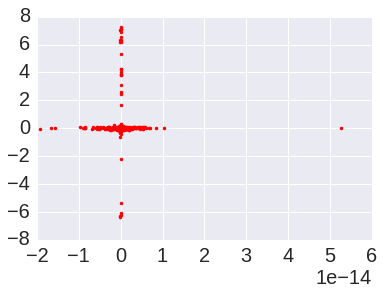

In [94]:
plt.plot(X.mean(axis=0), X_test.mean(axis=0), 'r.')
#plt.xlim(-0.05e-1, 0.05e-1)
#plt.ylim(-0.05e-1, 0.05e-1)

(-50000000000.0, 50000000000.0)

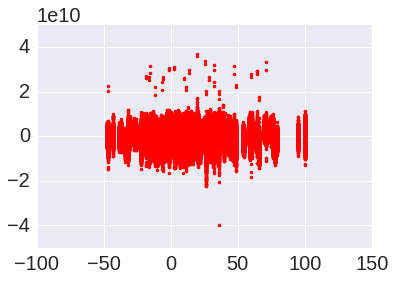

In [87]:
plt.plot(
    test_pair_wsyn['synergy_score_y'], 
    test_pair_wsyn['synergy_score_y_pred'], 
    'r.')
plt.xlim(-100, 150)
plt.ylim(-0.05e12, 0.05e12)

In [65]:
1485 * 300

445500

In [68]:
1485 * 1484

2203740

In [ ]:
len(set(train_pair[feature_columns].columns))

In [ ]:
len(set(test_pair[feature_columns].columns))

In [ ]:
sp.stats.pearsonr(
    xval_results_final['synergy_score_y'],
    xval_results_final['synergy_score_y_pred']
)

In [ ]:
xval_results_final2.head()

## Correct features

In [ ]:
# Main features

In [ ]:
assert ALL_TRAINING_DATA_PAIR['same_cell'].any()
assert ALL_TRAINING_DATA_PAIR['same_drug_pair'].any()
assert ALL_TRAINING_DATA_PAIR['same_drug'].any()

assert not (ALL_TRAINING_DATA_PAIR['same_drug_pair'] & ALL_TRAINING_DATA_PAIR['same_drug']).any()